### Importamos librerias

In [273]:
import pandas as pd
import numpy as np

In [274]:
import seaborn as sns
import matplotlib.pyplot as plt

In [275]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [276]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB

In [277]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [278]:
#no se que onda esta
#import warnings
#warnings.filterwarnings('ignore')

### Estilo

In [279]:
sns.set()
plt.style.use('classic')
sns.mpl.rcParams['axes.titlesize'] = 20
sns.mpl.rcParams['axes.labelsize'] = 18

### Dataset

Autor: PRACHI GOPALANI

In [280]:
# levantando el csv de Train
data = pd.read_csv('../TP3_SOCZ/Train.csv')

In [281]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [282]:
data = data.rename(columns={'Reached.on.Time_Y.N': 'On_time'})

In [283]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,On_time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


Importante aclarar lo siguiente: "On time: it is the target variable, 
where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time."

### Funciones

In [284]:
def basic_EDA(data) :
    u'''
    Basic EDA routine for this practice
    '''
    
    print()
    print("Observaciones", data.shape[0], "Features", data.shape[1])
    display(data.head(5))
    
    print()
    print("Descripción de las features")
    display(data.describe())
    
    print()
    print("Valores nulos")
    display(data.isnull().sum())
    
    print()
    print("Tipos de dato")
    display(data.dtypes)
    
    print()
    print("Cantidad de valores únicos")
    for i in data.columns:
        print(i,data[i].nunique())

    # La característica Score_point es del tipo objet y presenta valores no numéricos
    # al no contar con información sobre su significado se elimina del dataset
    #data.drop('Score_point', axis=1, inplace=True)

    # to have more legibility
    #data['label_means'] = data['label'].map({0 : 'insolvency', 1 : 'pay credit'})
    
    # to have more legibility
    data['On_time_means'] = data['On_time'].map({0 : 'on_time', 1 : 'delayed'})  
    
    return data

In [285]:
def show_some_plots(data, columns, target=None, cols=4) :
    u'''
    Display some countplots graphs for specific columns in dataset

    args
        data : dataset
        columns : series to count
        target : binary values to split the count; if is None draw a simple countplot
        cols : number of columns for the subplots; default is 4
    
    Original from Flavio Cavalcante at https://www.kaggle.com/code/flaviocavalcante/simple-eda-to-start
    '''
    
    rows = (len(columns) / cols) + 1
    if target != None :
        rows *= 2
    for i, column in enumerate(data[columns]) :
        if target == None :
            plt.subplot(rows, cols, i+1)
            sns.countplot(y=data[column])
            plt.tight_layout();
            plt.xlabel(None);
        else :
            # standar count plot
            plt.subplot(rows, cols, i*2+1)
            sns.countplot(y=data[column])
            plt.tight_layout();
            plt.xlabel(None);
            
            # count by target values
            plt.subplot(rows, cols, i*2+2)
            sns.countplot(data=data, x=column, hue=target)
            plt.tight_layout();
            plt.xlabel(column);
    return

In [286]:
def show_some_hists(data, columns, target=None, cols=4) :
    u'''
    Display some histograms graphs for specific columns in dataset

    args
        data : dataset
        columns : series to show 
        target : binary values to split the count; if is None draw a simple histplot
        cols : number of columns for the subplots; default is 4
    
    Original from Flavio Cavalcante at https://www.kaggle.com/code/flaviocavalcante/simple-eda-to-start
    '''
    
    rows = (len(columns) / cols) + 1
    for i, column in enumerate(data[columns]) :
        plt.subplot(rows, cols, i+1)
        sns.histplot(data=data, x=column, kde=True, hue=target)
        plt.tight_layout();
        plt.xlabel(column);
        plt.ylabel(None);
    return

In [287]:
def show_some_boxplots(data, columns, target=None, cols=4) :
    u'''
    Display some boxplots graphs for specific columns in dataset

    args
        data : dataset
        columns : series to show
        target : binary values to split the histogram; if is None draw a simple histplot
        cols : number of columns for the subplots; default is 4
    
    Original from Flavio Cavalcante at https://www.kaggle.com/code/flaviocavalcante/simple-eda-to-start
    '''
    
    rows = (len(columns) / cols) + 1
    for i, column in enumerate(data[columns]) :
        plt.subplot(rows, cols, i+1)
        sns.boxplot(data=data, x=target, y=column, palette="RdYlBu")
        plt.tight_layout();
        plt.xlabel(None);
        plt.ylabel(column);
    return

#la dejo como estaba para tener el original
def basic_plots(data) :
    u'''
    Shows counts plots for this practice
    '''
    
    fig = plt.figure(figsize=(25,40));
    fig.suptitle('\nCaracteríscias y su relación con el objetivo\n', 
                 verticalalignment='center', fontsize='xx-large', fontweight='extra bold')
    columns = list(data.drop(['label', 'label_means'], axis=1).columns)
    show_some_plots(data=data, columns=columns, target='label_means')
    
    return

In [288]:
def basic_plots(data) :
    u'''
    Shows counts plots for this practice
    '''
    
    fig = plt.figure(figsize=(25,40));
    fig.suptitle('\nCaracteríscias y su relación con el objetivo\n', 
                 verticalalignment='center', fontsize='xx-large', fontweight='extra bold')
    columns = list(data.drop(['ID'], axis=1).columns)
    show_some_plots(data=data, columns=columns, target='ID')
    
    return

In [289]:
def basic_hists(data) :
    u'''
    Shows histogrms for this practice
    '''
    
    fig = plt.figure(figsize=(25,25));
    fig.suptitle('\nHistogramas\n', verticalalignment='center', 
                 fontsize='xx-large', fontweight='extra bold')
    columns = list(data.drop(['On_time', 'On_time_means'], axis=1).columns)
    show_some_hists(data=data, columns=columns, target='On_time_means')

    return

In [290]:
def basic_boxplots(data) :
    u'''
    Shows bosx plots for this practice
    '''
    
    fig = plt.figure(figsize=(25,25));
    fig.suptitle('\nVariación de algunas características según el objetivo (insolvente si o no)\n', 
                 verticalalignment='center', fontsize='xx-large', fontweight='extra bold')
    columns=['Age', 'Marital', 'Field', 'Month_of_birth', 'Region', 
             'Number_of_credits', 'Linked_cards', 'Score_level', 'Score_class', 'Changed_phone_number']
    show_some_boxplots(data=data, columns=columns, target='On_time_means', cols=5)

    return

#### EDA (Exploratory Data Analysis)

In [291]:
data = basic_EDA(data)


Observaciones 10999 Features 12


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,On_time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1



Descripción de las features


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,On_time
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000



Valores nulos


ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
On_time                0
dtype: int64


Tipos de dato


ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
On_time                 int64
dtype: object


Cantidad de valores únicos
ID 10999
Warehouse_block 5
Mode_of_Shipment 3
Customer_care_calls 6
Customer_rating 5
Cost_of_the_Product 215
Prior_purchases 8
Product_importance 3
Gender 2
Discount_offered 65
Weight_in_gms 4034
On_time 2


In [292]:
print()
print("Variables categoricas")
categoricas = [column for column in data.columns if data[column].dtypes == object ]
print(categoricas)
    
    
print()
print("Variables numericas")
numericas = [column for column in data.columns if data[column].dtypes == "int64" ]
print(numericas)


Variables categoricas
['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'On_time_means']

Variables numericas
['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'On_time']


Vemos que todas las variables númericas son int, por ende no hace falta transformar nada.

<AxesSubplot:>

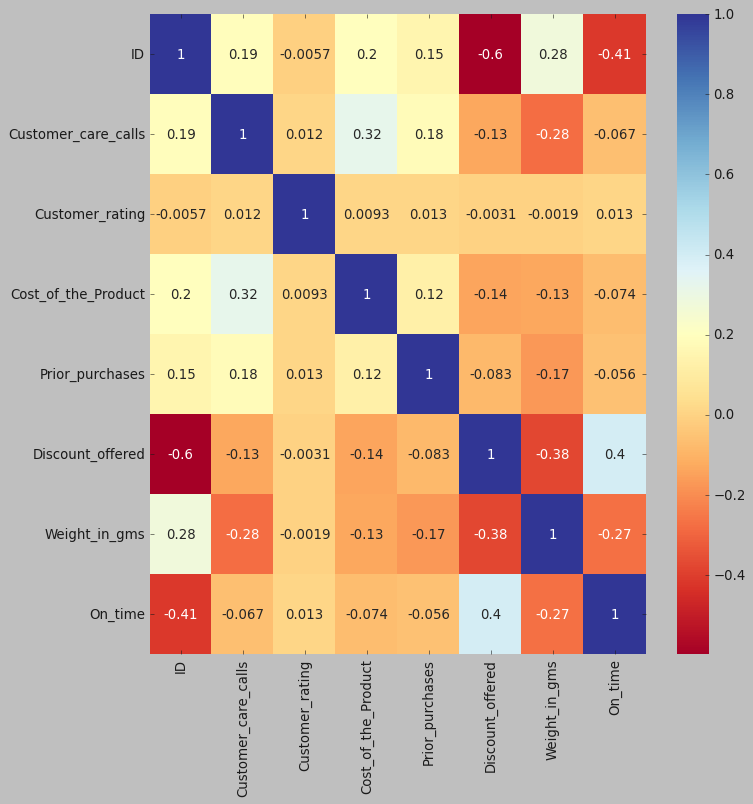

In [293]:
a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(data.corr(), annot = True, cmap="RdYlBu")

Se puede observar que las variables no están muy correlacionadas entre sí

In [294]:
#que será esto? skew es sesgo pero no se la verdad --> "Return unbiased skew over requested axis."
data.skew()

ID                     0.000000
Customer_care_calls    0.391926
Customer_rating        0.004360
Cost_of_the_Product   -0.157117
Prior_purchases        1.681897
Discount_offered       1.798929
Weight_in_gms         -0.249747
On_time               -0.394257
dtype: float64

<AxesSubplot:xlabel='Customer_care_calls', ylabel='count'>

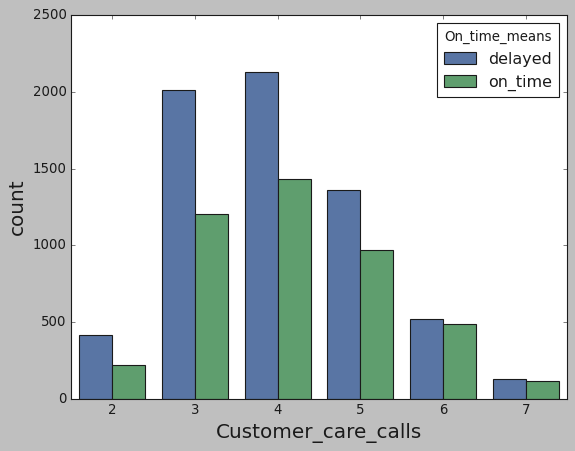

In [295]:
sns.countplot(x='Customer_care_calls',hue='On_time_means',data=data)
# we can see there are more than 2000 instances where the customer has to call 4 times in order get the package delivered

Veamos si el envío esta afectado por la importancia del producto

###### Ojo con lo siguiente

<AxesSubplot:xlabel='Product_importance', ylabel='count'>

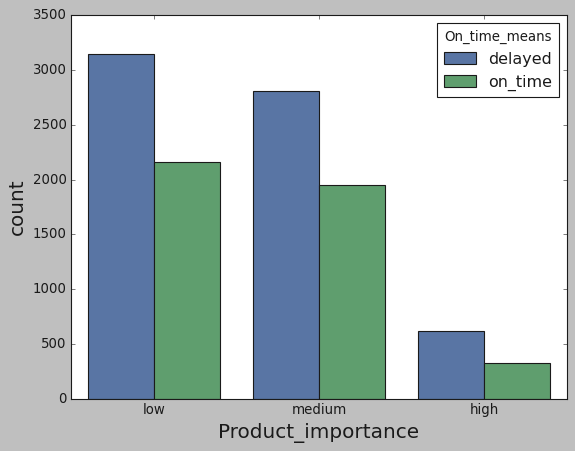

In [296]:
sns.countplot(x='Product_importance',hue='On_time_means',data=data)
#Se puede observar que los productos con baja importancia, fueron envíos demorados ##(toto) no lo veo a eso jaja

Hay outliers en precio?

<AxesSubplot:xlabel='Cost_of_the_Product'>

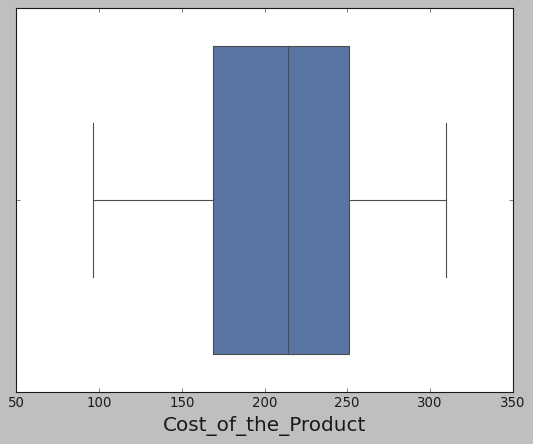

In [297]:
sns.boxplot(x='Cost_of_the_Product',data=data) #no outliers

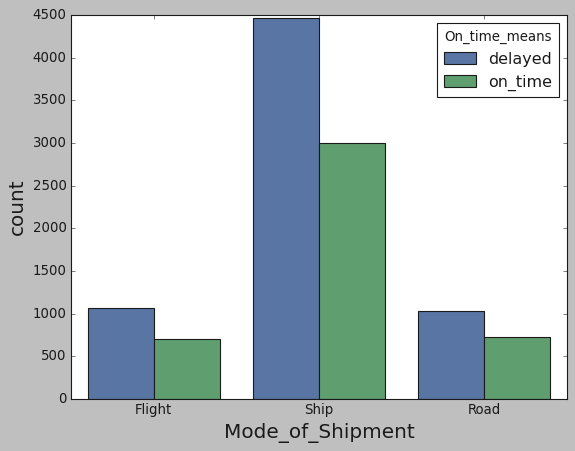

In [299]:
ax = sns.countplot(x='Mode_of_Shipment',hue='On_time_means',data=data)
# shipment is mostly done by ship

In [300]:
#La columna ID no nos aporta nada asique la dropeamos
data.drop(['ID'],inplace=True,axis=1)

Como no tenemos nulos, no tenemos nada que imputar y procedemos a dumificar

###### Debemos dumificar las variables object

In [301]:
dummies_warehouse_block = pd.get_dummies(data.Warehouse_block, drop_first=True)
print(dummies_warehouse_block.shape)
dummies_mode_of_shipment = pd.get_dummies(data.Mode_of_Shipment, drop_first=True)
print(dummies_mode_of_shipment.shape)
dummies_product_importance = pd.get_dummies(data.Product_importance, drop_first=True)
print(dummies_product_importance.shape)
dummies_gender = pd.get_dummies(data.Gender, drop_first=True)
print(dummies_gender.shape)

(10999, 4)
(10999, 2)
(10999, 2)
(10999, 1)


In [302]:
data = pd.concat([data,dummies_warehouse_block,dummies_mode_of_shipment,dummies_product_importance,dummies_gender], axis=1)
data.drop(["Warehouse_block","Mode_of_Shipment","Product_importance","Gender"],axis=1, inplace=True)

In [303]:
data.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,On_time,On_time_means,B,C,D,F,Road,Ship,low,medium,M
0,4,2,177,3,44,1233,1,delayed,0,0,1,0,0,0,1,0,0
1,4,5,216,2,59,3088,1,delayed,0,0,0,1,0,0,1,0,1
2,2,2,183,4,48,3374,1,delayed,0,0,0,0,0,0,1,0,1
3,3,3,176,4,10,1177,1,delayed,1,0,0,0,0,0,0,1,1
4,2,2,184,3,46,2484,1,delayed,0,1,0,0,0,0,0,1,0


#### Gráficos

In [304]:
#basic_plots(data)
#basic_hists(data)
#basic_boxplots(data)

#### Modelos

In [305]:
#para ver si estan balanceadas
data.On_time_means.value_counts(normalize = True)

delayed    0.596691
on_time    0.403309
Name: On_time_means, dtype: float64

In [306]:
X = data.drop(['On_time', 'On_time_means'], axis=1)
y = data['On_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, stratify = y)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test :", y_test.shape)

X_train: (7369, 15)
y_train: (7369,)
X_test:  (3630, 15)
y_test : (3630,)


In [307]:
y_train.value_counts(normalize = True)

1    0.596689
0    0.403311
Name: On_time, dtype: float64

In [308]:
y_test.value_counts(normalize = True)

1    0.596694
0    0.403306
Name: On_time, dtype: float64

In [309]:
class Model() :
    u'''
    Practice plain object
    '''
    def __init__(self, name, model) :
        u'''
        Object intializacion 
        '''
    
        self.name = name
        self.model = model
        self.accuracy = 0
        self.auc_roc = 0
        self.confusion = None
        return
    
    def __str__(self) :
        u'''
        String representation
        '''
        return self.name + \
        'Accuracy: ' + str(self.accuracy) + \
        'AUC ROC : ' + str(self.auc_roc)

In [310]:
# definir los modelos a entrenar
models = []
models.append( Model('Regresión Logística', LogisticRegression() ) )
models.append( Model('k-vecinos más Cercanos', KNeighborsClassifier() ) )
models.append( Model('Naive Bayes Gaussiano', GaussianNB() ) )

In [311]:
# entrenar los modelos y capturar los resultados
for m in models :
    m.model.fit(X_train, y_train)
    y_pred = m.model.predict(X_test)
    m.accuracy = metrics.accuracy_score(y_test, y_pred)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    m.auc_roc = metrics.auc(fpr, tpr)
    m.confusion = confusion_matrix(y_test, y_pred)

#### Resultados

In [312]:
def show_metrics(models) :
    u'''
    
    '''
    df = pd.DataFrame()
    for m in models :
        '''
        df = df.append( pd.DataFrame(
            columns=['Modelo', 'Accuracy', 'AUC-ROC'], 
            data=[ m.name, m.accuracy, m.auc_roc ]) )
        '''
        df = pd.concat([df, pd.DataFrame(columns=[['Model', 'Accuracy', 'AUC-ROC']], data=[[ m.name, m.accuracy, m.auc_roc ]])], axis=0)
    display(df)
    return

show_metrics(models)

,Model,Accuracy,AUC-ROC
0,Regresión Logística,0.625344,0.615437
0,k-vecinos más Cercanos,0.648485,0.641580
0,Naive Bayes Gaussiano,0.649311,0.702598


/var/folders/38/p7ql9b491vbf8r_ywxt8j7ym0000gp/T/ipykernel_38469/1957268635.py:14: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(rows, cols, i+1)


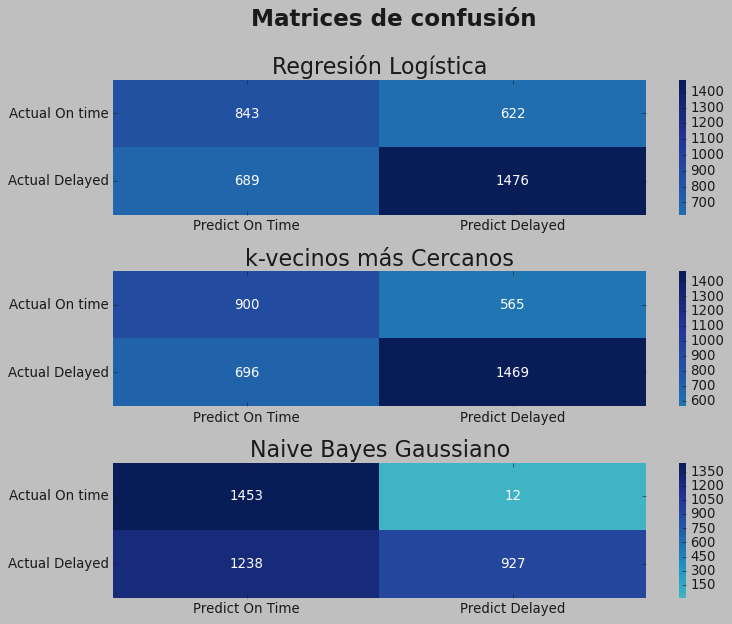

In [222]:
def show_confusion_matrix(models, cols=4) :
    u'''
    Display some confusion matrix graphs

    args
        models : list ob models objects
        cols : number of columns for the subplot; default is 4
    
    '''
    
    rows = (len(models) / cols) + 1
    
    for i, m in enumerate(models) :
        plt.subplot(rows, cols, i+1)
        sns.heatmap(pd.DataFrame(data=m.confusion, 
                                 index=['Actual On time', 'Actual Delayed'],
                                 columns=['Predict On Time', 'Predict Delayed'] ), 
                    annot=True, center=0, fmt='d', cmap='YlGnBu')
        plt.tight_layout();
        plt.title(m.name);
        plt.ylabel(None)
        plt.xlabel(None)
        
    return

fig = plt.figure(figsize=(10,10));
fig.suptitle('Matrices de confusión', 
             verticalalignment='center', fontsize='xx-large', fontweight='extra bold')
show_confusion_matrix(models, 1)